In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
all_train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

C:\Users\shooh_000\Anaconda3\envs\python2\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


Breed feature unique count: 1380


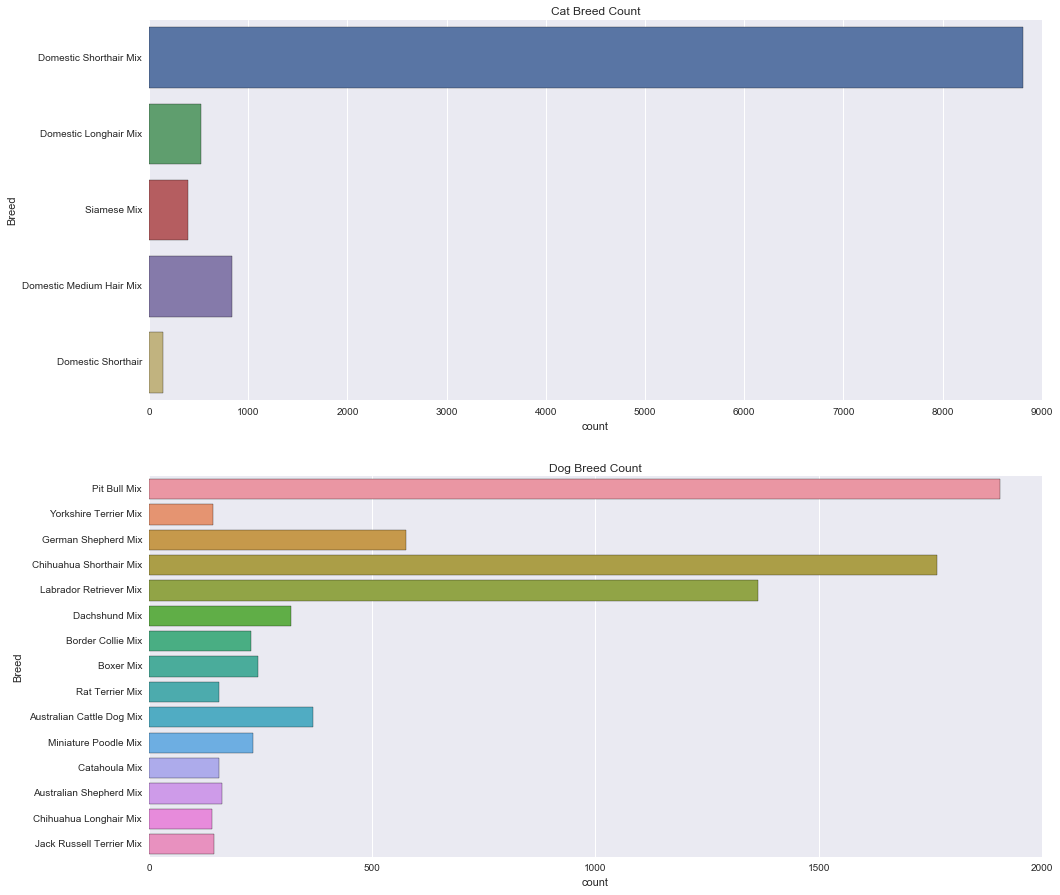

In [81]:
##Exploring some of the breed features

print 'Breed feature unique count:', len(all_train.groupby(['Breed'])['Breed'].nunique())

all_train_cat = all_train[all_train['AnimalType']=='Cat']
all_train_dog = all_train[all_train['AnimalType']=='Dog']

pop_cat = list(all_train_cat['Breed'].value_counts()[all_train_cat['Breed'].value_counts() > 100].index)
plot_cat = all_train_cat[all_train_cat['Breed'].isin(pop_cat)]

pop_dog = list(all_train_dog['Breed'].value_counts()[all_train_dog['Breed'].value_counts() > 140].index)
plot_dog = all_train_dog[all_train_dog['Breed'].isin(pop_dog)]

plt.figure(figsize=(16,15))

plt.subplot(2,1,1)
sns.countplot(y='Breed', data=plot_cat)
sns.plt.title('Cat Breed Count')

plt.subplot(2,1,2)
sns.countplot(y='Breed', data=plot_dog)
sns.plt.title('Dog Breed Count')

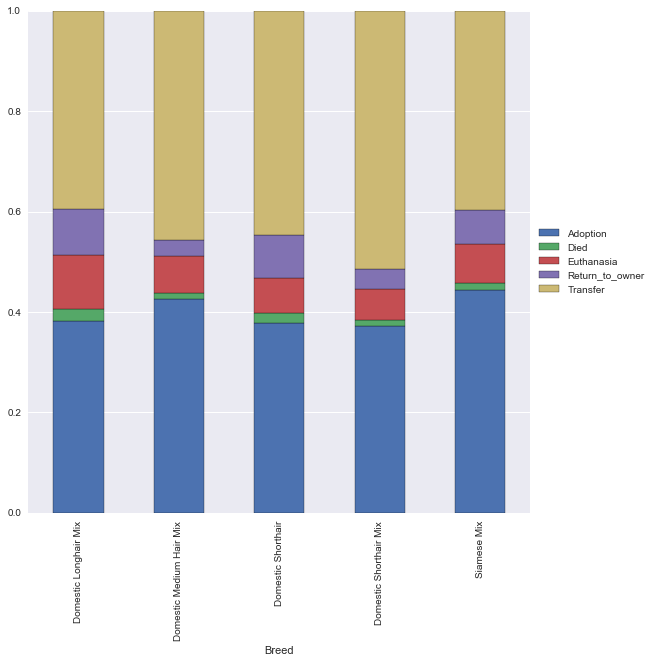

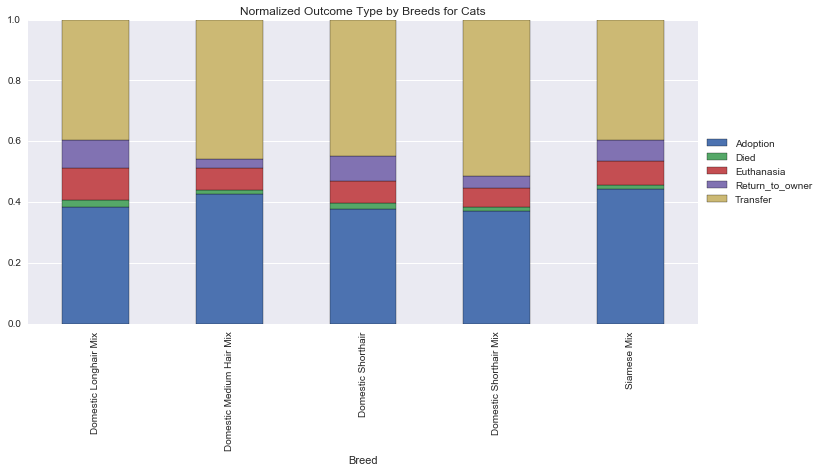

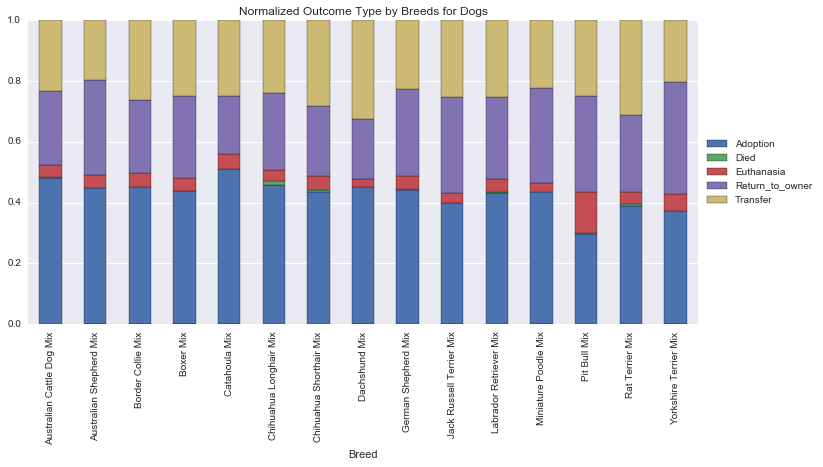

In [130]:
##Taking the popular animals and seeing how their outcomes vary
cat_outcome = plot_cat.groupby(['Breed','OutcomeType']).size().unstack()
cat_outcome_normalized = cat_outcome.div(plot_cat.groupby(['Breed']).size(),axis='rows')
fig=plt.figure(figsize=(12,12))
ax = fig.add_subplot(2,1,1)
ax = cat_outcome_normalized.plot(kind='bar',stacked=True,ax=ax, title="Normalized Outcome Type by Breeds for Cats")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

dog_outcome = plot_dog.groupby(['Breed','OutcomeType']).size().unstack()
dog_outcome_normalized = dog_outcome.div(plot_dog.groupby(['Breed']).size(),axis='rows')
fig=plt.figure(figsize=(12,12))
ax = fig.add_subplot(2,1,2)
ax = dog_outcome_normalized.plot(kind='bar',stacked=True,ax=ax, title="Normalized Outcome Type by Breeds for Dogs")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()